## Setup

### Imports

In [14]:
import plotly.graph_objects as go

import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [15]:
sns.set_style('darkgrid')

### Definitions

In [16]:
path_data_dir = '../data/'

In [17]:
list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA"]

In [18]:
relevant_cols = ['Date', 'Close', 'Volume']

###  Prepare the data

#### create dataframe

In [19]:
data = pd.DataFrame()
for asset in tqdm(list_assets):
    
    # read data
    data_temp = pd.read_csv(path_data_dir + f'processed/price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv')
    
    # rename columns
    data_temp.columns = [f'{col}_{asset}' if col != 'Date' else 'Date' for col in data_temp.columns ]
    
    # if is the first iteraction
    if len(data) == 0: 
        data = data_temp.copy()
        continue
    
    # merge
    data = data.merge(
        data_temp,
        on = 'Date'
    )
    
data.dropna(inplace=True)

data.set_index('Date', inplace=True)

100%|██████████| 7/7 [00:00<00:00, 111.52it/s]


In [20]:
data.head(10)

Close_PETR3.SA  Volume_PETR3.SA  SMA_21_PETR3.SA  \
Date                                                           
2010-11-24       27.879999        4800300.0        28.778095   
2010-11-25       27.500000        1524200.0        28.791905   
2010-11-26       27.230000        3504500.0        28.733810   
2010-11-27       27.230000        3504500.0        28.733810   
2010-11-28       27.230000        3504500.0        28.733810   
2010-11-29       27.500000        5664600.0        28.672381   
2010-11-30       27.370001        7449000.0        28.604286   
2010-12-01       28.160000        4198200.0        28.585714   
2010-12-02       28.209999        3639900.0        28.543333   
2010-12-03       28.580000        3195000.0        28.509048   

            MSTD_21_PETR3.SA  Day_of_week_PETR3.SA  Weekend_PETR3.SA  \
Date                                                                   
2010-11-24          0.934776                     2                 0   
2010-11-25          0.912325                     3                 0   
2010-11-26          0.972073                     4                 0   
2010-11-27          0.972073                     5                 1   
2010-11-28          0.972073                     6                 1   
2010-11-29          1.008424                     0                 0   
2010-11-30          1.046922                     1                 0   
2010-12-01          1.051383                     2                 0   
2010-12-02          1.047547                     3                 0   
2010-12-03          1.033228                     4                 0   

            Invalid_Days_PETR3.SA  diff_close_mean_PETR3.SA  \
Date                                                          
2010-11-24                      0                 -0.898096   
2010-11-25                      0                 -1.291905   
2010-11-26                      0                 -1.503810   
2010-11-27                      1                 -1.503810   
2010-11-28                      1                 -1.503810   
2010-11-29                      0                 -1.172381   
2010-11-30                      0                 -1.234285   
2010-12-01                      0                 -0.425715   
2010-12-02                      0                 -0.333334   
2010-12-03                      0                  0.070952   

            diff_close_mean_z_score_PETR3.SA  meta_PETR3.SA  ...  \
Date                                                         ...   
2010-11-24                         -0.960761              0  ...   
2010-11-25                         -1.416058             -1  ...   
2010-11-26                         -1.547014             -1  ...   
2010-11-27                         -1.547014             -1  ...   
2010-11-28                         -1.547014             -1  ...   
2010-11-29                         -1.162587             -1  ...   
2010-11-30                         -1.178965             -1  ...   
2010-12-01                         -0.404909              0  ...   
2010-12-02                         -0.318205              0  ...   
2010-12-03                          0.068670              0  ...   

            Close_FLRY3.SA  Volume_FLRY3.SA  SMA_21_FLRY3.SA  \
Date                                                           
2010-11-24       10.443588         303503.0        10.447629   
2010-11-25       10.467162          23118.0        10.452120   
2010-11-26       10.556746          75716.0        10.472102   
2010-11-27       10.556746          75716.0        10.472102   
2010-11-28       10.556746          75716.0        10.472102   
2010-11-29       10.302139         258752.0        10.473449   
2010-11-30       10.750059        1195137.0        10.494778   
2010-12-01       10.655760         742957.0        10.508250   
2010-12-02       10.844357         519412.0        10.514761   
2010-12-03       11.009380         404034.0        10.533845   

            MSTD_21_FLRY3.SA  Day_o

In [21]:
data_close = data[[col for col in data.columns if 'Close' in col]]
data_vol = data[[col for col in data.columns if 'Volume' in col]]

## Analysis

### Basic describe

In [22]:
data.describe()

Close_PETR3.SA  Volume_PETR3.SA  SMA_21_PETR3.SA  MSTD_21_PETR3.SA  \
count     4894.000000     4.894000e+03      4894.000000       4894.000000   
mean        22.807961     1.361836e+07        22.779918          0.994268   
std          8.255981     1.143817e+07         8.131833          0.686447   
min          5.910000     0.000000e+00         6.338571          0.184936   
25%         16.112501     6.987450e+06        16.332857          0.579728   
50%         22.500000     1.090740e+07        22.461429          0.833108   
75%         29.307499     1.675350e+07        29.142857          1.221610   
max         44.490002     3.104194e+08        43.139048          7.598455   

       Day_of_week_PETR3.SA  Weekend_PETR3.SA  Invalid_Days_PETR3.SA  \
count           4894.000000       4894.000000            4894.000000   
mean               2.999796          0.285656               0.320392   
std                2.000051          0.451772               0.466675   
min                0.000000          0.000000               0.000000   
25%                1.000000          0.000000               0.000000   
50%                3.000000          0.000000               0.000000   
75%                5.000000          1.000000               1.000000   
max                6.000000          1.000000               1.000000   

       diff_close_mean_PETR3.SA  diff_close_mean_z_score_PETR3.SA  \
count               4894.000000                       4894.000000   
mean                   0.028043                          0.067226   
std                    1.607369                          1.317489   
min                  -14.124762                         -3.901364   
25%                   -0.809167                         -1.034810   
50%                    0.041191                          0.063733   
75%                    0.967618                          1.160810   
max                    5.827618                          3.872128   

       meta_PETR3.SA  ...  Close_FLRY3.SA  Volume_FLRY3.SA  SMA_21_FLRY3.SA  \
count    4894.000000  ...     4894.000000     4.894000e+03      4894.000000   
mean        0.053944  ...       16.009650     1.574012e+06        15.989748   
std         0.954703  ...        6.717684     1.610367e+06         6.685779   
min        -3.000000  ...        6.318017     0.000000e+00         6.614833   
25%        -1.000000  ...       10.133581     5.002710e+05        10.148904   
50%         0.000000  ...       15.160000     1.268733e+06        15.289524   
75%         1.000000  ...       22.018761     2.145812e+06        22.096445   
max         3.000000  ...       31.590086     5.491270e+07        30.062446   

       MSTD_21_FLRY3.SA  Day_of_week_FLRY3.SA  Weekend_FLRY3.SA  \
count       4894.000000           4894.000000       4894.000000   
mean           0.515788              2.999796          0.285656   
std            0.411294              2.000051          0.451772   
min            0.061033              0.000000          0.000000   
25%            0.245710              1.000000          0.000000   
50%            0.430209              3.000000          0.000000   
75%            0.656510              5.000000          1.000000   
max            4.629221              6.000000          1.000000   

       Invalid_Days_FLRY3.SA  diff_close_mean_FLRY3.SA  \
count            4894.000000               4894.000000   
mean                0.320392                  0.019902   
std                 0.466675                  0.879175   
min                 0.000000                 -9.089503   
25%                 0.000000                 -0.382751   
50%                 0.000000                 -0.019309   
75%                 1.000000                  0.417159   
max                 1.000000                  5.032860   

       diff_close_mean_z_score_FLRY3.SA  meta_FLRY3.SA  
count                       4894.000000    4894.000000  
mean                          -0.015624      -0.004495  
std                            1

#### Correlation

Close_PETR3.SA  Close_PRIO3.SA  Close_VALE3.SA  \
Close_PETR3.SA        1.000000        0.763053        0.760269   
Close_PRIO3.SA        0.763053        1.000000        0.673409   
Close_VALE3.SA        0.760269        0.673409        1.000000   
Close_GGBR3.SA        0.773160        0.766671        0.916567   
Close_ABCB4.SA        0.665759        0.436585        0.543514   
Close_ITUB3.SA        0.490922        0.111094        0.452324   
Close_FLRY3.SA        0.316776       -0.005939        0.424623   

                Close_GGBR3.SA  Close_ABCB4.SA  Close_ITUB3.SA  Close_FLRY3.SA  
Close_PETR3.SA        0.773160        0.665759        0.490922        0.316776  
Close_PRIO3.SA        0.766671        0.436585        0.111094       -0.005939  
Close_VALE3.SA        0.916567        0.543514        0.452324        0.424623  
Close_GGBR3.SA        1.000000        0.520532        0.312806        0.275060  
Close_ABCB4.SA        0.520532        1.000000        0.857147        0.681262  
Close_ITUB3.SA        0.312806        0.857147        1.000000        0.790043  
Close_FLRY3.SA        0.275060        0.681262        0.790043        1.000000

None


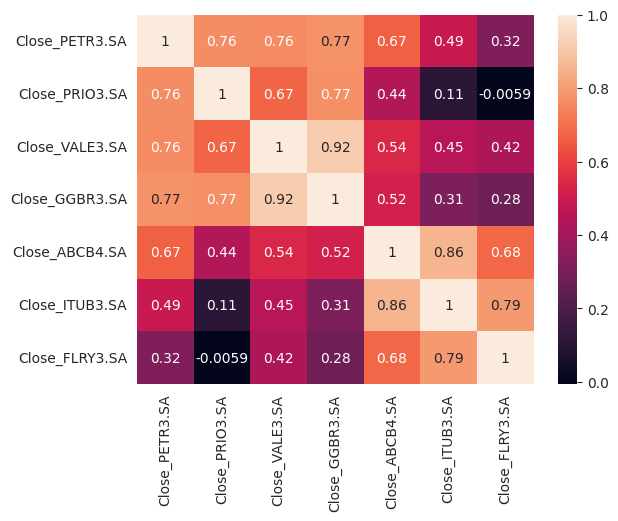

In [23]:
# close correlation
corr_mtrx_close = data_close.corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()

Volume_PETR3.SA  Volume_PRIO3.SA  Volume_VALE3.SA  \
Volume_PETR3.SA         1.000000         0.354923         0.475474   
Volume_PRIO3.SA         0.354923         1.000000         0.509149   
Volume_VALE3.SA         0.475474         0.509149         1.000000   
Volume_GGBR3.SA         0.010637        -0.116898        -0.128108   
Volume_ABCB4.SA         0.404109         0.419894         0.508355   
Volume_ITUB3.SA         0.100902         0.159805         0.169117   
Volume_FLRY3.SA         0.275017         0.301237         0.531617   

                 Volume_GGBR3.SA  Volume_ABCB4.SA  Volume_ITUB3.SA  \
Volume_PETR3.SA         0.010637         0.404109         0.100902   
Volume_PRIO3.SA        -0.116898         0.419894         0.159805   
Volume_VALE3.SA        -0.128108         0.508355         0.169117   
Volume_GGBR3.SA         1.000000        -0.058725        -0.023529   
Volume_ABCB4.SA        -0.058725         1.000000         0.157199   
Volume_ITUB3.SA        -0.023529         0.157199         1.000000   
Volume_FLRY3.SA        -0.121205         0.352450         0.124630   

                 Volume_FLRY3.SA  
Volume_PETR3.SA         0.275017  
Volume_PRIO3.SA         0.301237  
Volume_VALE3.SA         0.531617  
Volume_GGBR3.SA        -0.121205  
Volume_ABCB4.SA         0.352450  
Volume_ITUB3.SA         0.124630  
Volume_FLRY3.SA         1.000000

None


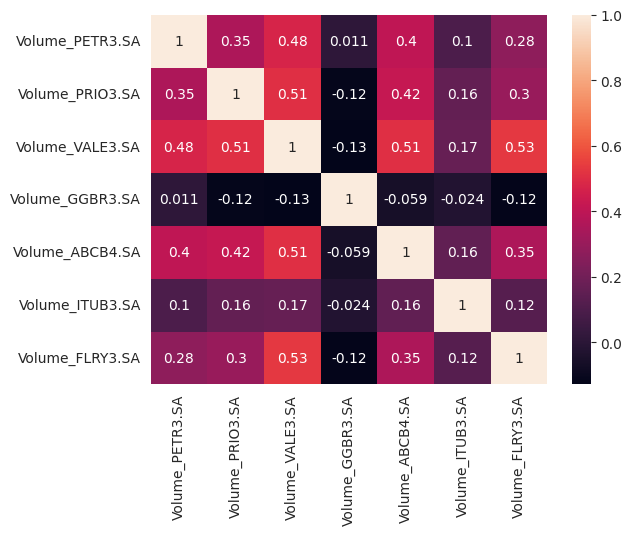

In [24]:
# close correlation
corr_mtrx_vol = data_vol.corr()
print(display(corr_mtrx_vol))

sns.heatmap(corr_mtrx_vol, annot=True)
plt.show()

In [25]:
# simple moving average 
window_size = 21

In [26]:
for asset in list_assets:

    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[f'Close_{asset}'],
                        mode='lines',
                        name=f'Close {asset}'))
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[f'SMA_{window_size}_{asset}'],
                        mode='lines',
                        name=f'SMA {window_size} {asset}'))
    std_2_plt = [1]
    for std in std_2_plt:
        
        upper = data[f'SMA_{window_size}_{asset}'] + std * data[f'MSTD_{window_size}_{asset}']
        lower = data[f'SMA_{window_size}_{asset}'] - std * data[f'MSTD_{window_size}_{asset}']
        
        fig.add_trace(go.Scatter(
            x = data.index,
            y = upper,
            mode='lines',
            name=f'Upper Bound (std {std})'))
        fig.add_trace(go.Scatter(
            x = data.index,
            y = lower,
            mode='lines',
            fill='tonexty',
            name=f'Lower Bound (std {std})'))
            
    fig.update_layout(
    title=f"{asset}",
    hovermode="x")

    fig.show()